MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


--- Dữ liệu HMM Rời rạc ---
Quan sát (dạng số nguyên): [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
Trạng thái ẩn thực sự:     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
Chú thích trạng thái: 0 = Nắng, 1 = Mưa
Chú thích quan sát: 0 = Đi dạo, 1 = Mua sắm, 2 = Dọn dẹp
----------------------------------------
--- Kết quả Thuật toán Viterbi ---
Trạng thái thực sự:        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

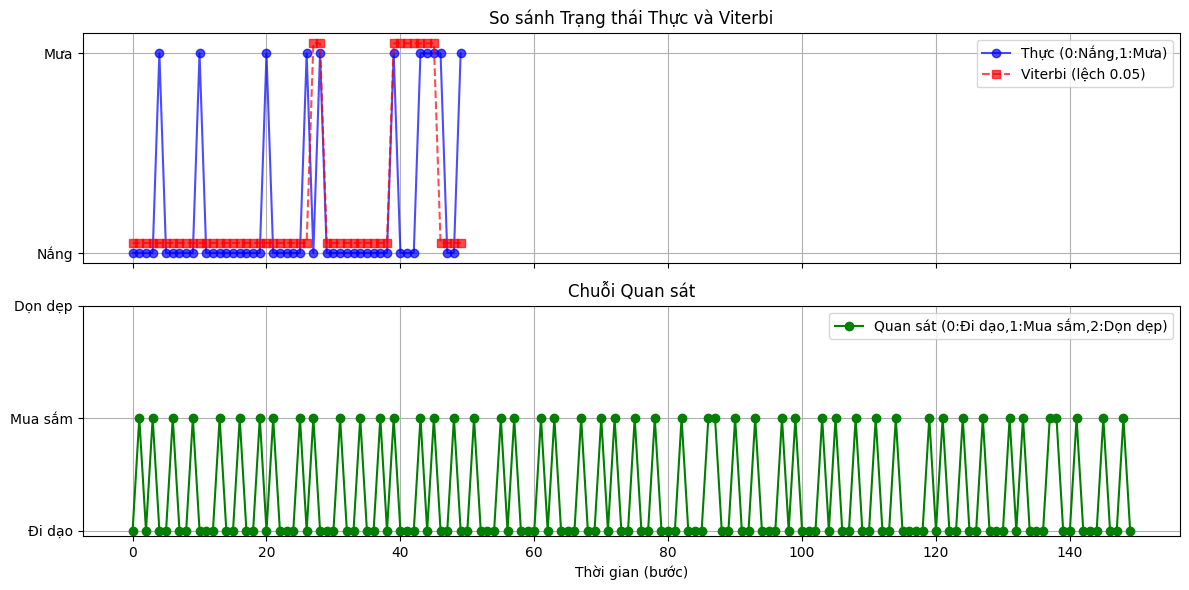

In [ ]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

# --- Bước 1: Định nghĩa Mô hình HMM Rời rạc Đơn giản ---
# Ví dụ: Mô hình thời tiết (Nắng, Mưa) và hoạt động quan sát được (Đi dạo, Mua sắm, Dọn dẹp)

n_states = 2 
n_observations = 3 
start_probability = np.array([0.6, 0.4])
transition_probability = np.array([
    [0.7, 0.3], 
    [0.4, 0.6],  # Từ Mưa → Nắng 40%, → Mưa 60%
])

# Ma trận xác suất phát xạ (emission matrix B)
emission_probability = np.array([
    [0.6, 0.3, 0.1],  # Nếu Nắng: P(Đi dạo)=0.6, P(Mua sắm)=0.3, P(Dọn dẹp)=0.1
    [0.1, 0.4, 0.5],  # Nếu Mưa: P(Đi dạo)=0.1, P(Mua sắm)=0.4, P(Dọn dẹp)=0.5
])

# --- Tạo mô hình HMM với n_trials=1 để quan sát categorical ---
model_discrete = hmm.MultinomialHMM(
    n_components=n_states,
    n_trials=1,
    init_params="",  # Không khởi tạo lại π, A, B khi fit
    params="ste"     # Chỉ fit state-transition-emission nếu cần
)
model_discrete.startprob_    = start_probability
model_discrete.transmat_     = transition_probability
model_discrete.emissionprob_ = emission_probability

# --- Bước 2: Tạo Dữ liệu Tổng hợp từ Mô hình HMM ---
n_samples = 50  # Độ dài chuỗi
observations_discrete, true_states_discrete = model_discrete.sample(n_samples)

print("--- Dữ liệu HMM Rời rạc ---")
print("Quan sát (dạng số nguyên):", observations_discrete.flatten().tolist())
print("Trạng thái ẩn thực sự:    ", true_states_discrete.tolist())
print("Chú thích trạng thái: 0 = Nắng, 1 = Mưa")
print("Chú thích quan sát: 0 = Đi dạo, 1 = Mua sắm, 2 = Dọn dẹp")
print("-" * 40)

# --- Bước 3: Giải mã chuỗi với Viterbi ---
log_likelihood_viterbi, decoded_states_viterbi = model_discrete.decode(
    observations_discrete, algorithm="viterbi"
)

print("--- Kết quả Thuật toán Viterbi ---")
print("Trạng thái thực sự:       ", true_states_discrete.tolist())
print("Trạng thái giải mã:       ", decoded_states_viterbi.tolist())
print(f"Log likelihood (Viterbi): {log_likelihood_viterbi:.2f}")
accuracy_viterbi = np.mean(true_states_discrete == decoded_states_viterbi)
print(f"Độ chính xác Viterbi:     {accuracy_viterbi*100:.2f}%")
print("-" * 40)

# --- Bước 4: (Tuỳ chọn) Trực quan hóa kết quả ---
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# So sánh trạng thái thực và giải mã
ax[0].plot(true_states_discrete,       "bo-", label="Thực (0:Nắng,1:Mưa)", alpha=0.7)
ax[0].plot(decoded_states_viterbi+0.05,"rs--", label="Viterbi (lệch 0.05)", alpha=0.7)
ax[0].set_yticks([0, 1])
ax[0].set_yticklabels(["Nắng", "Mưa"])
ax[0].set_title("So sánh Trạng thái Thực và Viterbi")
ax[0].legend()
ax[0].grid(True)

# Chuỗi quan sát
ax[1].plot(observations_discrete.flatten(), "go-", label="Quan sát (0:Đi dạo,1:Mua sắm,2:Dọn dẹp)")
ax[1].set_yticks([0, 1, 2])
ax[1].set_yticklabels(["Đi dạo", "Mua sắm", "Dọn dẹp"])
ax[1].set_xlabel("Thời gian (bước)")
ax[1].set_title("Chuỗi Quan sát")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


--- Dữ liệu cho Bộ lọc Kalman ---
Số bước thời gian: 50
------------------------------
--- Kết quả Bộ lọc Kalman ---
------------------------------
RMSE cho vị trí (lọc): 0.4768
------------------------------


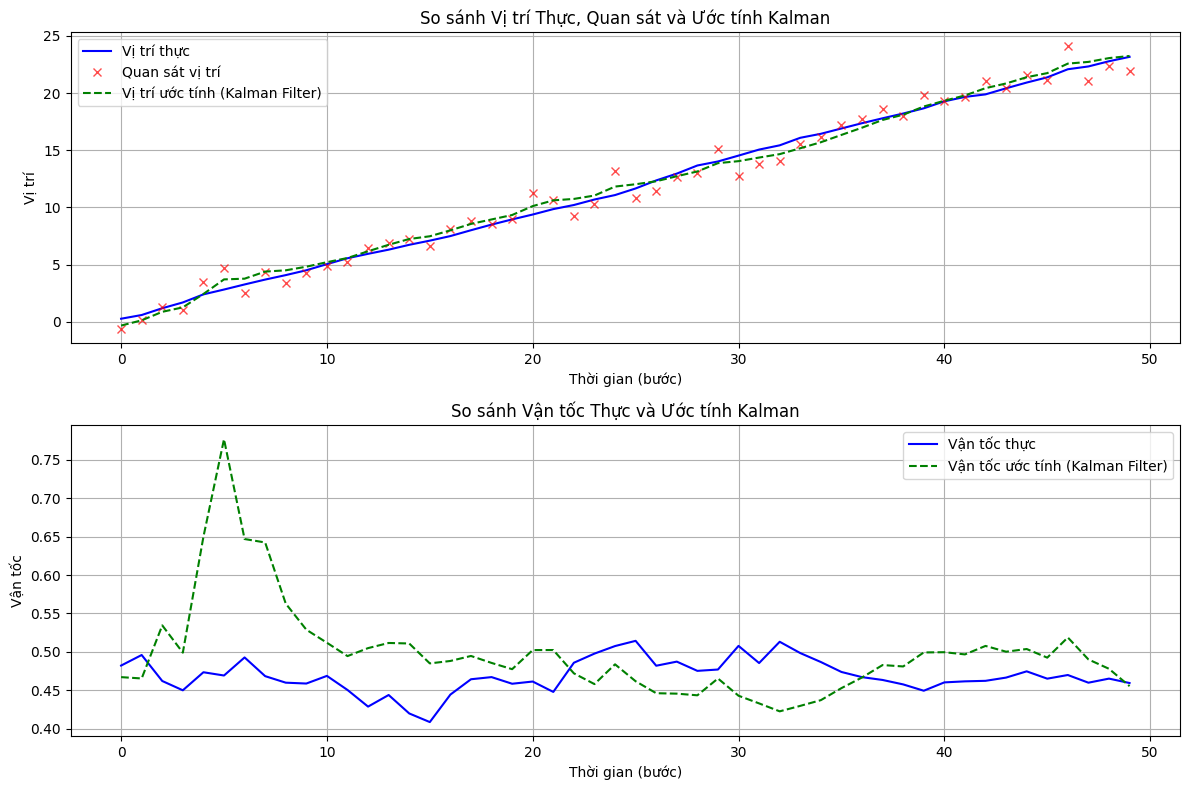

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# --- Bước 1: Định nghĩa Mô hình HMM Tuyến tính Gaussian ---
# Ví dụ: Theo dõi một đối tượng di chuyển theo một chiều.
# Trạng thái ẩn (x_k) bao gồm [vị trí, vận tốc].
# Quan sát (z_k) chỉ là vị trí đo được.

# Ma trận chuyển trạng thái (F hoặc A trong một số tài liệu)
# x_k = F * x_{k-1} + w_k
# [pos_k] = [1  dt] [pos_{k-1}] + w_pos
# [vel_k]   [0  1 ] [vel_{k-1}]   w_vel
dt = 1.0  # Khoảng thời gian giữa các bước
transition_matrix = np.array([[1, dt],
                              [0, 1]])

# Ma trận quan sát (H)
# z_k = H * x_k + v_k
# [obs_pos_k] = [1  0] [pos_k] + v_obs_pos
#                       [vel_k]
observation_matrix = np.array([[1, 0]])

# Hiệp phương sai nhiễu quá trình (Q)
# Mô tả sự không chắc chắn trong mô hình chuyển trạng thái.
# Giả sử nhiễu nhỏ trong gia tốc (ảnh hưởng đến vận tốc, sau đó ảnh hưởng đến vị trí)
# Sử dụng công thức G^T * sigma_a^2 * G, với G = [dt^2/2; dt] và sigma_a là std dev của gia tốc
# Hoặc đơn giản hơn, đặt một giá trị nhỏ cho thấy vận tốc không hoàn toàn không đổi.
process_noise_std = 0.05 # Độ lệch chuẩn của nhiễu gia tốc (ví dụ)
# Cách đơn giản hóa:
transition_covariance = np.diag([0.1, process_noise_std**2]) * 0.1 # Thêm một chút nhiễu vào vị trí và vận tốc
# Ví dụ:
# transition_covariance = np.array([[0.1, 0.0],  # Nhiễu nhỏ trong vị trí
#                                   [0.0, 0.01]]) # Nhiễu nhỏ trong vận tốc


# Hiệp phương sai nhiễu đo lường (R)
# Mô tả sự không chắc chắn trong các phép đo.
observation_covariance = np.array([[1.0]]) # Độ lệch chuẩn của nhiễu đo vị trí là 1.0

# Trạng thái ban đầu và hiệp phương sai trạng thái ban đầu
initial_state_mean = np.array([0, 0.5])  # Bắt đầu từ vị trí 0, vận tốc 0.5
initial_state_covariance = np.array([[1, 0.1],
                                     [0.1, 0.1]])

# Số lượng mẫu thời gian
n_timesteps = 50

# --- Bước 2: Tạo Dữ liệu Tổng hợp ---
# Tạo chuỗi trạng thái ẩn thực sự
true_states_kf = np.zeros((n_timesteps, 2)) # Mỗi hàng là [vị trí, vận tốc]
true_states_kf[0] = initial_state_mean + np.random.multivariate_normal(np.zeros(2), initial_state_covariance)

for t in range(1, n_timesteps):
    process_noise = np.random.multivariate_normal(np.zeros(2), transition_covariance)
    true_states_kf[t] = np.dot(transition_matrix, true_states_kf[t-1]) + process_noise

# Tạo chuỗi quan sát
observations_kf = np.zeros((n_timesteps, 1)) # Mỗi hàng là [vị trí quan sát được]
for t in range(n_timesteps):
    measurement_noise = np.random.multivariate_normal(np.zeros(1), observation_covariance)
    observations_kf[t] = np.dot(observation_matrix, true_states_kf[t]) + measurement_noise

print("--- Dữ liệu cho Bộ lọc Kalman ---")
print(f"Số bước thời gian: {n_timesteps}")
# print(f"Trạng thái ẩn thực sự (vài mẫu đầu):\n{true_states_kf[:5]}")
# print(f"Quan sát (vài mẫu đầu):\n{observations_kf[:5]}")
print("-" * 30)

# --- Bước 3: Áp dụng Bộ lọc Kalman ---
# Khởi tạo bộ lọc Kalman
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance
)

# Chạy bộ lọc Kalman trên dữ liệu quan sát
# `filter` trả về giá trị trung bình và hiệp phương sai của trạng thái đã lọc
filtered_state_means, filtered_state_covariances = kf.filter(observations_kf)

# Bạn cũng có thể sử dụng `smooth` để có ước tính tốt hơn bằng cách sử dụng tất cả dữ liệu
# smoothed_state_means, smoothed_state_covariances = kf.smooth(observations_kf)

print("--- Kết quả Bộ lọc Kalman ---")
# print(f"Trạng thái ước tính (lọc - vài mẫu đầu):\n{filtered_state_means[:5]}")
# if 'smoothed_state_means' in locals():
#     print(f"Trạng thái ước tính (làm trơn - vài mẫu đầu):\n{smoothed_state_means[:5]}")
print("-" * 30)

# --- Bước 4: Đánh giá Hiệu suất ---
# Chúng ta quan tâm đến việc ước tính vị trí (thành phần đầu tiên của trạng thái)
true_positions = true_states_kf[:, 0]
estimated_positions_filtered = filtered_state_means[:, 0]
# if 'smoothed_state_means' in locals():
#    estimated_positions_smoothed = smoothed_state_means[:, 0]

# Tính toán Sai số Toàn phương Trung bình Gốc (RMSE)
rmse_filtered = np.sqrt(np.mean((true_positions - estimated_positions_filtered)**2))
print(f"RMSE cho vị trí (lọc): {rmse_filtered:.4f}")

# if 'smoothed_state_means' in locals():
#    rmse_smoothed = np.sqrt(np.mean((true_positions - estimated_positions_smoothed)**2))
#    print(f"RMSE cho vị trí (làm trơn): {rmse_smoothed:.4f}")
print("-" * 30)

# --- Bước 5: Trực quan hóa Kết quả ---
time_steps = np.arange(n_timesteps)

plt.figure(figsize=(12, 8))

# Vẽ đồ thị vị trí
plt.subplot(2, 1, 1)
plt.plot(time_steps, true_positions, 'b-', label='Vị trí thực')
plt.plot(time_steps, observations_kf[:, 0], 'rx', label='Quan sát vị trí', alpha=0.7)
plt.plot(time_steps, estimated_positions_filtered, 'g--', label='Vị trí ước tính (Kalman Filter)')
# if 'smoothed_state_means' in locals():
#     plt.plot(time_steps, estimated_positions_smoothed, 'm-.', label='Vị trí ước tính (Kalman Smoother)')
plt.xlabel('Thời gian (bước)')
plt.ylabel('Vị trí')
plt.title('So sánh Vị trí Thực, Quan sát và Ước tính Kalman')
plt.legend()
plt.grid(True)

# Vẽ đồ thị vận tốc (nếu muốn)
plt.subplot(2, 1, 2)
plt.plot(time_steps, true_states_kf[:, 1], 'b-', label='Vận tốc thực')
plt.plot(time_steps, filtered_state_means[:, 1], 'g--', label='Vận tốc ước tính (Kalman Filter)')
# if 'smoothed_state_means' in locals():
#     plt.plot(time_steps, smoothed_state_means[:, 1], 'm-.', label='Vận tốc ước tính (Kalman Smoother)')
plt.xlabel('Thời gian (bước)')
plt.ylabel('Vận tốc')
plt.title('So sánh Vận tốc Thực và Ước tính Kalman')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


--- Dữ liệu cho Particle Filter ---
Số bước thời gian: 50, Số hạt: 2000
------------------------------
RMSE (Particle Filter): 0.9713
------------------------------


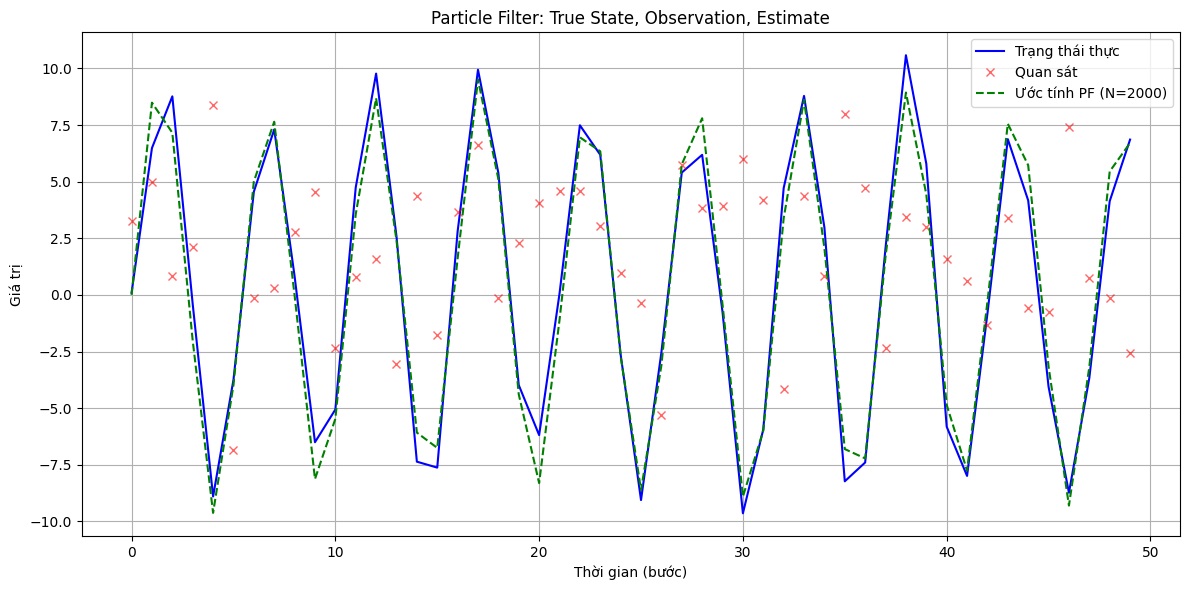

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
from filterpy.monte_carlo import systematic_resample

# --- Bước 1: Định nghĩa Mô hình Hệ thống và Tham số ---
N_PARTICLES = 2000  # Số lượng hạt
N_TIMESTEPS  = 50   # Số bước thời gian

# Tham số nhiễu
Q_std = 1.0  # Độ lệch chuẩn nhiễu quá trình
R_std = 3.0  # Độ lệch chuẩn nhiễu đo lường
Q     = Q_std**2
R     = R_std**2

# Trạng thái ban đầu
x0_true = 0.1
P0      = 5.0  # Hiệp phương sai ban đầu (để khởi tạo hạt)

# Hàm chuyển trạng thái phi tuyến
def f_x(x_prev, k_minus_1):
    return 0.5 * x_prev + 2.5 * x_prev / (1 + x_prev**2) + 8 * np.cos(1.2 * k_minus_1)

# Hàm quan sát phi tuyến
def h_x(x_k):
    return x_k**2 / 20

# --- Bước 2: Tạo Dữ liệu Tổng hợp ---
true_states_pf    = np.zeros(N_TIMESTEPS)
observations_pf   = np.zeros(N_TIMESTEPS)
process_noise     = np.random.normal(0, Q_std, N_TIMESTEPS)
measurement_noise = np.random.normal(0, R_std, N_TIMESTEPS)

true_states_pf[0]    = x0_true
observations_pf[0] = h_x(x0_true) + measurement_noise[0]

for k in range(1, N_TIMESTEPS):
    true_states_pf[k]  = f_x(true_states_pf[k-1], k-1) + process_noise[k]
    observations_pf[k] = h_x(true_states_pf[k]) + measurement_noise[k]

print("--- Dữ liệu cho Particle Filter ---")
print(f"Số bước thời gian: {N_TIMESTEPS}, Số hạt: {N_PARTICLES}")
print("-" * 30)

# --- Bước 3: Triển khai Particle Filter ---
particles = np.random.normal(x0_true, np.sqrt(P0), N_PARTICLES)
weights   = np.ones(N_PARTICLES) / N_PARTICLES

estimated_states_pf = np.zeros(N_TIMESTEPS)
estimated_states_pf[0] = np.average(particles, weights=weights)

for k in range(1, N_TIMESTEPS):
    # Prediction
    particles = f_x(particles, k-1) + np.random.normal(0, Q_std, N_PARTICLES)

    # Update
    likelihoods = norm.pdf(observations_pf[k], loc=h_x(particles), scale=R_std)
    weights *= likelihoods
    weights += 1e-300
    weights /= np.sum(weights)

    # Resample if needed
    ess = 1.0 / np.sum(weights**2)
    if ess < N_PARTICLES / 2:
        idx = systematic_resample(weights)
        particles = particles[idx]
        weights = np.ones(N_PARTICLES) / N_PARTICLES

    # Estimate
    estimated_states_pf[k] = np.average(particles, weights=weights)

# --- Bước 4: Đánh giá hiệu suất ---
rmse_pf = np.sqrt(np.mean((true_states_pf - estimated_states_pf)**2))
print(f"RMSE (Particle Filter): {rmse_pf:.4f}")
print("-" * 30)

# --- Bước 5: Trực quan hóa kết quả ---
t = np.arange(N_TIMESTEPS)
plt.figure(figsize=(12,6))
plt.plot(t, true_states_pf,    'b-', label='Trạng thái thực')
plt.plot(t, observations_pf,  'rx', label='Quan sát', alpha=0.6)
plt.plot(t, estimated_states_pf, 'g--', label=f'Ước tính PF (N={N_PARTICLES})')
plt.xlabel('Thời gian (bước)')
plt.ylabel('Giá trị')
plt.title('Particle Filter: True State, Observation, Estimate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
